In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

A1.Findthe first derivative of your speech signal with finite differencemethod. Listen to the first derivative signal and the original speech signal.

Playing First Derivative Signal:


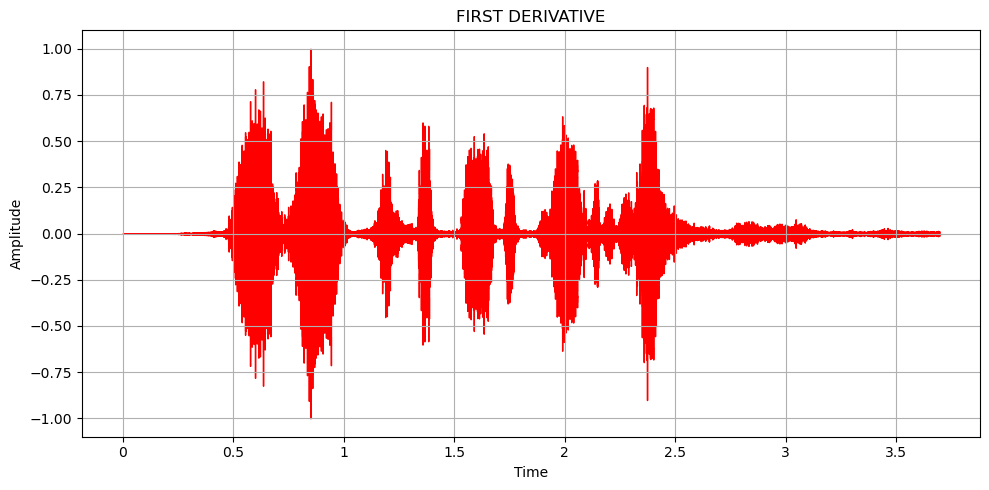

In [2]:
# Load audio file
audio_signal, sample_rate = librosa.load("recording.mp3")

# Compute first derivative of the audio signal
first_derivative = np.diff(audio_signal)
first_derivative /= np.max(np.abs(first_derivative))  # Normalize

print("Playing First Derivative Signal:")

# Plotting the first derivative
plt.figure(figsize=(10, 5))
librosa.display.waveshow(first_derivative, sr=sample_rate, color='red')
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Play the first derivative of the audio signal
ipd.Audio(first_derivative, rate=sample_rate)


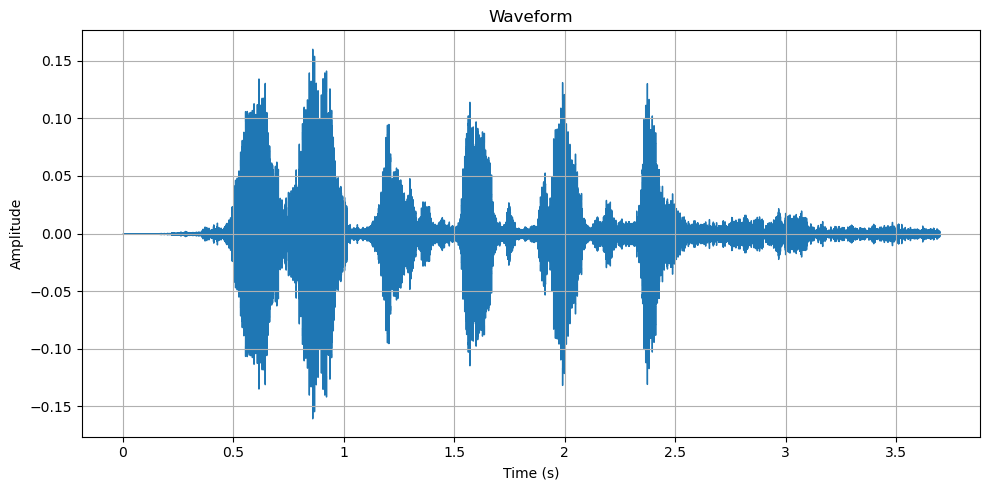

In [3]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio_signal, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
# Playing back the audio
ipd.Audio(audio_signal, rate=sample_rate)

A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

C:\Users\RAJENDAR\.android\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\RAJENDAR\.android\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\RAJENDAR\AppData\Local\Temp\ipykernel_18560\1102443763.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
C:\Users\RAJENDAR\AppData\Local\Temp\ipykernel_18560\1102443763.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 3.4670931181041516


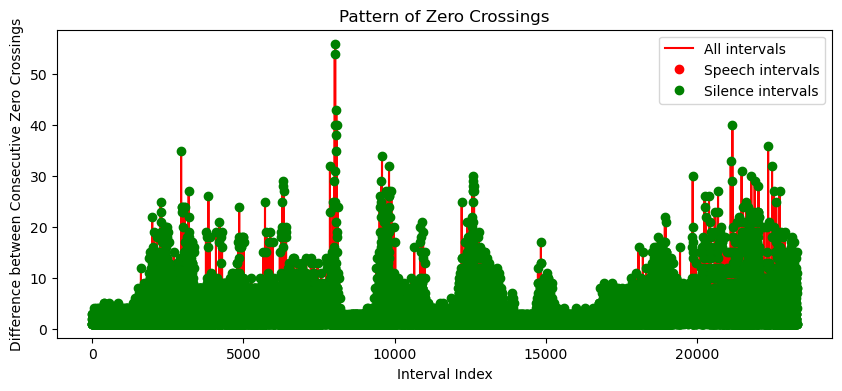

In [10]:

zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
zero_crossing_diffs = np.diff(zero_crossings)
threshold = 1000

# Distinguish between speech and silence based on the threshold
speech_intervals = zero_crossing_diffs[zero_crossing_diffs > threshold]
silence_intervals = zero_crossing_diffs[zero_crossing_diffs <= threshold]

# Calculate average lengths
avg_speech_interval_length = np.mean(speech_intervals)
avg_silence_interval_length = np.mean(silence_intervals)

# Print average lengths
print("Average length between consecutive zero crossings in speech regions:", avg_speech_interval_length)
print("Average length between consecutive zero crossings in silence regions:", avg_silence_interval_length)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(zero_crossing_diffs, label='All intervals', color='red')
plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence intervals', color='green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Interval Index')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

A3. Speak 5 of your favoritewords. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your projectteam-mate.

The length Duration of first audio file: 5.832018140589569 seconds
The length Duration of Second audio file: 6.864036281179138 seconds


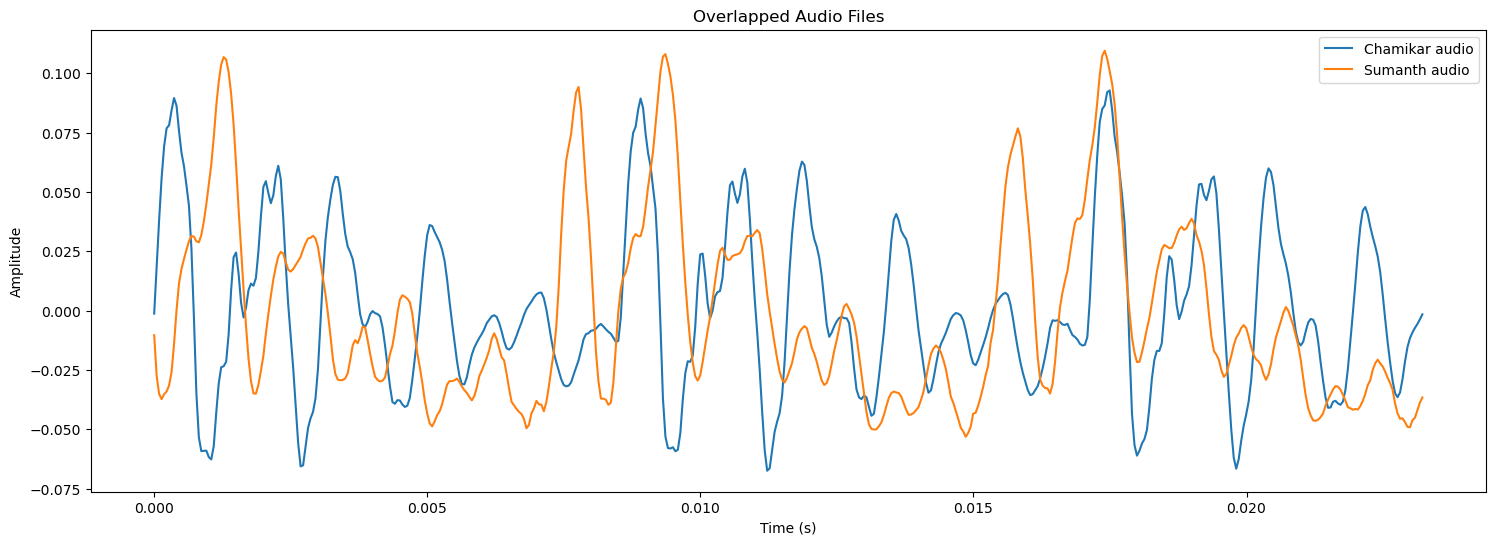

In [11]:
Chamikar_file = r'recording2.mp3'
Sumanth_file = r'recordingsumanth.mp3'

# Load audio signals
y1, sr1 = librosa.load(Chamikar_file)
y2, sr2 = librosa.load(Sumanth_file)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
Chamikar_trimmed = remove_silence(y1, sr1)
Sumanth_trimmed = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(Chamikar_trimmed) / sr1, len(Chamikar_trimmed))
time2 = np.linspace(0, len(Sumanth_trimmed) / sr2, len(Sumanth_trimmed))

# Plot the trimmed audio files
plt.figure(figsize=(18, 6))
plt.plot(time1, Chamikar_trimmed, label='Chamikar audio')
plt.plot(time2, Sumanth_trimmed, label='Sumanth audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.

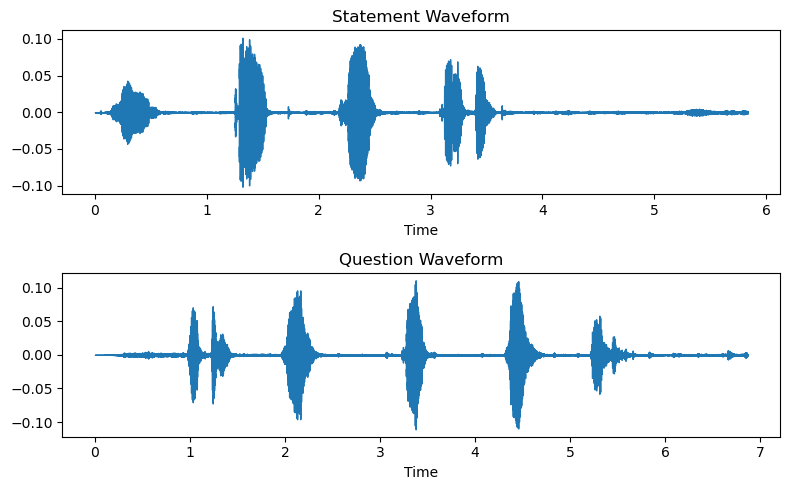

In [9]:
file_1 = r'recording2.mp3'
file_2 = r'recordingsumanth.mp3'
statement_signal, sr_statement = librosa.load(file_1) # Load audio signals
question_signal, sr_question = librosa.load(file_2)
plt.figure(figsize=(8,5))
# Plot waveforms
plt.subplot(2, 1, 1)
librosa.display.waveshow(statement_signal, sr=sr_statement)
plt.title('Statement Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(question_signal, sr=sr_question)
plt.title('Question Waveform')
plt.tight_layout()
plt.show()